Assignment 2 (due on 11/8)

学生：教明明 (12332328)

批改人：Zhao Shuhui

得分：35/50  
建议下次按照题序排版

=========================================
# 1 Significant Earthquakes
18/25  
1.1 计算每个国家从BC2150开始的地震死亡人数，并输出最多的10个国家，附上相应人数——TA跑不出结果  3/5  
1.2 计算每年全世界震级大于6.0的地震数量，并画出时间序列，在报告中陈述是否有趋势以及理由——没有在报告中陈述趋势及理由  9/10  
1.3 创建CountEq_LargestEq方法，要求方法返回 1）给定国家从BC2150开始的地震数量；2）该国家最严重地震的发生日期。对数据集中的所有国家使用该方法，将得到的结果按地震数量从大到小排序——TA跑不出结果；统计有错误  6/10  
产生问题的主要原因是所使用的数据不充足，少了Country列导致很多分组操作无法进行

## 1.2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#第一题

In [3]:
data = pd.read_csv(r'C:\Program1\jupyter_notebook\ese5023\earthquakes.tsv',delimiter='\t', encoding='utf-8')
data

,Search Parameters,Id,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,-2150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2.0,-2000.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,3.0,-2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
4,NaN,5877.0,-1610.0,NaN,NaN,NaN,NaN,NaN,3.0,1351.0,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6398,NaN,10709.0,2023.0,10.0,8.0,20.0,25.0,23.0,5891.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6399,NaN,10710.0,2023.0,10.0,11.0,0.0,41.0,56.0,NaN,NaN,...,NaN,NaN,164.0,3.0,NaN,2.0,NaN,NaN,NaN,NaN
6400,NaN,10712.0,2023.0,10.0,15.0,3.0,36.0,0.0,NaN,NaN,...,NaN,NaN,153.0,3.0,NaN,2.0,NaN,2.0,NaN,NaN
6401,NaN,10716.0,2023.0,11.0,3.0,18.0,2.0,54.0,NaN,NaN,...,NaN,NaN,364.0,3.0,NaN,3.0,26557.0,4.0,35455.0,4.0


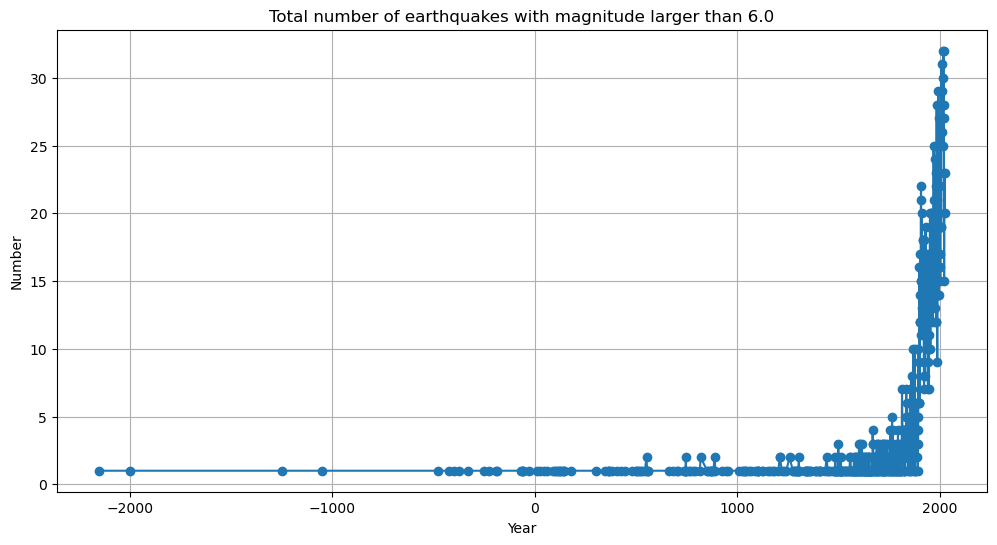

In [4]:
#第2问
earthquake_data = data[['Year', 'Mag']]

# 过滤出震级大于6.0的地震数据
large_quakes = earthquake_data[earthquake_data['Mag'] > 6.0]

# 使用Pandas对数据进行分组，并计算每年的地震总数
earthquake_counts = large_quakes.groupby('Year')['Year'].count()

# 创建时间序列图
plt.figure(figsize=(12, 6))
plt.plot(earthquake_counts.index, earthquake_counts.values, marker='o', linestyle='-')
plt.title("Total number of earthquakes with magnitude larger than 6.0")
plt.xlabel("Year")
plt.ylabel("Number")
plt.grid(True)
plt.show()


In [7]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

file=r'C:\Program1\jupyter_notebook\ese5023\earthquakes.tsv'
Year=1
Month=2
Day=3
Hour=4
Minute=5
Second=6
Location_Name=9
Magnitude=13
Deaths=15

class Eqs:
    data=[]

    def __init__(self):
        idx=0
        with open(file, encoding='utf-8') as file_obj:
            for line in file_obj:
                list = line.split('\t')

                if(idx>1):
                    self.data.append({})
                    if(list[Year]==''):
                        self.data[idx - 2]['Year']=None
                    else:
                        self.data[idx-2]['Year']=int(list[Year])
                    if (list[Month] == ''):
                        self.data[idx - 2]['Month'] = None
                    else:
                        self.data[idx - 2]['Month'] = int(list[Month])
                    if (list[Day] == ''):
                        self.data[idx - 2]['Day'] = None
                    else:
                        self.data[idx - 2]['Day'] = int(list[Day])
                    if (list[Hour] == ''):
                        self.data[idx - 2]['Hour'] = None
                    else:
                        self.data[idx - 2]['Hour'] = int(list[Hour])
                    if (list[Minute] == ''):
                        self.data[idx - 2]['Minute'] = None
                    else:
                        self.data[idx - 2]['Minute'] = int(list[Minute])
                    if (list[Second] == ''):
                        self.data[idx - 2]['Second'] = None
                    else:
                        self.data[idx - 2]['Second'] = float(list[Second])
                    if(list[Location_Name]==''):
                        self.data[idx - 2]['Location_Name']=None
                    else:
                        self.data[idx-2]['Location_Name'] = eval(list[Location_Name]).split(':')[0]
                    if(list[Magnitude]==''):
                        self.data[idx - 2]['Magnitude']=None
                    else:
                        self.data[idx - 2]['Magnitude']=float(list[Magnitude])
                    if(list[Deaths]==''):
                        self.data[idx - 2]['Deaths']=None
                    else:
                        self.data[idx - 2]['Deaths']=int(list[Deaths])
                idx += 1
    def Func_1(self):
        country={}
        for dt in self.data:
            if dt['Location_Name'] not in country:
                country[dt['Location_Name']]=0
            else:
                if(dt['Deaths']!=None):
                    country[dt['Location_Name']]+=dt['Deaths']
        st_country=sorted(country.items(),key=lambda x:x[1],reverse=True)
        for i in range(10):
            print(st_country[i])
    def Func_2(self):
        year={}
        for dt in self.data:
            if dt['Year'] not in year:
                year[dt['Year']]=0
            else:
                if(dt['Magnitude']!=None and dt['Magnitude']>6.0):
                    year[dt['Year']]+=1
        st_year=sorted(year.items(),key=lambda x:x[0])
        years=[]
        nums=[]
        for item in st_year:
            years.append(item[0])
            nums.append(item[1])
        plt.figure(figsize=(24, 8))
        plt.scatter(years, nums)
        plt.xticks(fontsize=5)
        plt.xticks(rotation=90)
        x_major_locator = MultipleLocator(50)
        y_major_locator = MultipleLocator(1)
        ax = plt.gca()
        ax.xaxis.set_major_locator(x_major_locator)
        ax.yaxis.set_major_locator(y_major_locator)
        plt.show()
    def CountEq_LargestEq(self,name):
        cnt=0
        max_idx=-1
        for idx in range(len(self.data)):
            if(self.data[idx]['Location_Name']==name):
                cnt+=1
                if(max_idx==-1 and self.data[idx]['Magnitude']!=None):
                    max_idx=idx
                else:
                    if(self.data[idx]['Magnitude']!=None and self.data[idx]['Magnitude']>self.data[max_idx]['Magnitude']):
                        max_idx=idx
        return (cnt,str(self.data[max_idx]['Year'])+' '+str(self.data[max_idx]['Month'])+' '+str(self.data[max_idx]['Day'])+' '+str(self.data[max_idx]['Hour'])+' '+str(self.data[max_idx]['Minute'])+' '+str(self.data[max_idx]['Second']))
        # print(name,cnt,end=" ")
        # if(max_idx!=-1):
        #     print(self.data[max_idx]['Year'],self.data[max_idx]['Month'],self.data[max_idx]['Day'],self.data[max_idx]['Hour'],self.data[max_idx]['Minute'],self.data[max_idx]['Second'])
    def Func_3(self):
        country = {}
        for dt in self.data:
            if dt['Location_Name'] not in country:
                country[dt['Location_Name']] = list(self.CountEq_LargestEq(dt['Location_Name']))
        st_country = sorted(country.items(), key=lambda x: x[1][0], reverse=True)
        for item in st_country:
            print(item[0],end=' ')
            print(item[1][0],item[1][1])
            
# if __name__ == '__main__':
Sig_Eqs=Eqs()
# Sig_Eqs.Func_1()
Sig_Eqs.Func_2()
# Sig_Eqs.CountEq_LargestEq('CHINA')
# Sig_Eqs.Func_3()

ValueError: could not convert string to float: '"JORDAN:  BAB-A-DARAA,AL-KARAK"'

## 1.3

## 1.3

In [8]:
#第3问
Sig_Eqs.CountEq_LargestEq('CHINA')
Sig_Eqs.Func_3()

NameError: name 'Sig_Eqs' is not defined

In [9]:
#1.3参考代码
Sig_Eqs=pd.read_csv(r'C:\Program1\jupyter_notebook\ese5023\earthquakes.tsv',sep='\t', encoding='utf-8')
def CountEq_LargestEq(country):
    #取特定国家的数据，获取长度为地震数量
    eqn=len(Sig_Eqs[Sig_Eqs['Country']==country])
    #取特定国家的数据，根据Mag的值从大到小排序，第一列即震级最大的那次地震
    maMag=Sig_Eqs[Sig_Eqs['Country']==country].sort_values('Mag',ascending=False)
    #取第一列的日期
    yr=int(maMag.iloc[0].Year)
    mo=maMag.iloc[0].Mo
    dy=maMag.iloc[0].Dy
    if np.isnan(mo):
        date=f'year {yr:04}'
        # print(country,date)
    elif np.isnan(dy):
        mo=int(mo)
        date=f'year/month {yr:04d}/{mo:02d}'
        # print(country,date)
    else:
        mo=int(mo)
        dy=int(dy)
        date=f'{yr:04d}/{mo:02d}/{dy:02d}'
    return eqn,date

#去掉nan    
Sig_Eqs1=Sig_Eqs[~pd.isnull(Sig_Eqs['Country'])]
#获取各个国家到list
countrylist=Sig_Eqs1['Country'].unique()
#对每个城市都使用方法，收集到一个DataFrame里
eqnlist=[]
datelist=[]
for country in countrylist:
    eqn,date=CountEq_LargestEq(country)
    eqnlist.append(eqn)
    datelist.append(date)
df1=pd.DataFrame()
df1['country']=countrylist
df1['number Of earthquakes']=eqnlist
df1['the date of the largest earthquake']=datelist
#根据地震数量从大到小排列
df1=df1.sort_values('number Of earthquakes',ascending=False)
df1

,country,number Of earthquakes,the date of the largest earthquake
14,CHINA,620,1668/07/25
33,JAPAN,414,2011/03/11
68,INDONESIA,411,2004/12/26
7,IRAN,384,0856/12/22
9,TURKEY,335,2023/02/06
...,...,...,...
93,NORWAY,1,1819/08/31
126,CENTRAL AFRICAN REPUBLIC,1,1921/09/16
124,PALAU,1,1914/10/23
118,KIRIBATI,1,1905/06/30


## 1.1

In [69]:
#第1问
Sig_Eqs=Eqs()
Sig_Eqs.Func_1()

('CHINA', 2075045)
('TURKEY', 1092048)
('IRAN', 995406)
('ITALY', 498478)
('SYRIA', 369224)
('HAITI', 323478)
('AZERBAIJAN', 317219)
('JAPAN', 278085)
('ARMENIA', 191890)
('ISRAEL', 160120)


In [12]:
#1.1参考代码：
#读入文件，查看文件信息
Sig_Eqs=pd.read_csv(r'C:\Program1\jupyter_notebook\ese5023\earthquakes.tsv',sep='\t', encoding='utf-8')
# print(len(Sig_Eqs),Sig_Eqs.columns)
#根据国家分组后计算所有列的总和，根据TotalDeaths一列从大到小排序
eqs_1=Sig_Eqs.groupby(['Country']).sum().sort_values('Total Deaths', ascending=False)
eqs_1['Total Deaths'].head(10)

Country
CHINA         2041929.0
TURKEY         995648.0
IRAN           758650.0
SYRIA          437700.0
ITALY          422679.0
JAPAN          356083.0
HAITI          323776.0
AZERBAIJAN     310119.0
INDONESIA      282819.0
ARMENIA        189000.0
Name: Total Deaths, dtype: float64

=========================================
# 2 Windspeed
3/10  
以时间为x轴画出月平均风速，在报告中回答是否观察到某种趋势；同时在报告中说明你是如何筛选数据的——对WND列进行了分解，但是没有做出正确的数据筛选和处理，导致风速结果上百，不符合常理；报告中没有说明趋势；图表中变量需标注单位


In [51]:
# import pandas 
import pandas as pd
# import numpy
import numpy as np
# import matplotlib
from matplotlib import pyplot as plt
# make plots appear and be stored within the notebook
%matplotlib inline
#第二题

In [13]:
data = pd.read_csv(r'C:\Program1\jupyter_notebook\ese5023\2281305.csv', low_memory=False)
data

,STATION,DATE,SOURCE,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,AA1,AA2,AA3,AJ1,...,OD1,OD2,QUALITY_CONTROL.1,REM,REPORT_TYPE.1,SLP,SOURCE.1,TMP,VIS,WND
0,59493099999,2010-01-02T00:00:00,4,SY-MT,ZGSZ,V020,"06,0000,2,1","24,0000,2,1",NaN,NaN,...,NaN,NaN,V020,SYN088AAXX 02001 59493 11740 80402 10161 2013...,SY-MT,"10161,1",4,"+0161,1","004000,1,N,1","040,1,N,0020,1"
1,59493099999,2010-01-02T01:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET068METAR ZGSZ 020100Z VRB01MPS 2600 BR FEW0...,FM-15,"99999,9",4,"+0170,1","002600,1,N,1","999,9,V,0010,1"
2,59493099999,2010-01-02T02:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET068METAR ZGSZ 020200Z 00000MPS 2600 BR FEW0...,FM-15,"99999,9",4,"+0180,1","002600,1,N,1","999,9,C,0000,1"
3,59493099999,2010-01-02T03:00:00,4,SY-MT,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,SYN066AAXX 02031 59493 41750 81401 10192 2014...,SY-MT,"10169,1",4,"+0192,1","005000,1,N,1","140,1,N,0010,1"
4,59493099999,2010-01-02T04:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET068METAR ZGSZ 020400Z 30004MPS 2100 BR FEW0...,FM-15,"99999,9",4,"+0180,1","002100,1,N,1","300,1,N,0040,1"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111979,59493099999,2020-09-11T17:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET058METAR ZGSZ 111700Z 17003MPS 9999 BKN020 ...,FM-15,"99999,9",4,"+0290,1","009999,1,9,9","170,1,N,0030,1"
111980,59493099999,2020-09-11T18:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET058METAR ZGSZ 111800Z 18004MPS 9999 BKN020 ...,FM-15,"99999,9",4,"+0290,1","009999,1,9,9","180,1,N,0040,1"
111981,59493099999,2020-09-11T19:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET088METAR ZGSZ 111900Z 22003MPS 200V260 9999...,FM-15,"99999,9",4,"+0290,1","009999,1,9,9","220,1,V,0030,1"
111982,59493099999,2020-09-11T20:00:00,4,FM-15,99999,V020,NaN,NaN,NaN,NaN,...,NaN,NaN,V020,MET067METAR ZGSZ 112000Z 26003MPS 9999 SCT020 ...,FM-15,"99999,9",4,"+0290,1","009999,1,9,9","260,1,N,0030,1"


In [14]:
data['DATE'] = pd.to_datetime(data['DATE'])

In [15]:
data['Year'] = data['DATE'].dt.year
data['Month'] = data['DATE'].dt.month
data['WND'] = data['WND'].str.split(',').str[3].astype(float)

In [16]:
current_year = pd.Timestamp.now().year
data_last_10_years = data[data['Year'] >= current_year - 10]

In [17]:
result = data_last_10_years.groupby(['Year', 'Month'])['WND'].mean().reset_index()

In [18]:
result['Year-Month'] = result['Year'].astype(str) + '-' + result['Month'].astype(str).str.zfill(2)
result = result.sort_values('Year-Month')

In [19]:
result = result[['Year-Month', 'WND']].reset_index(drop=True)

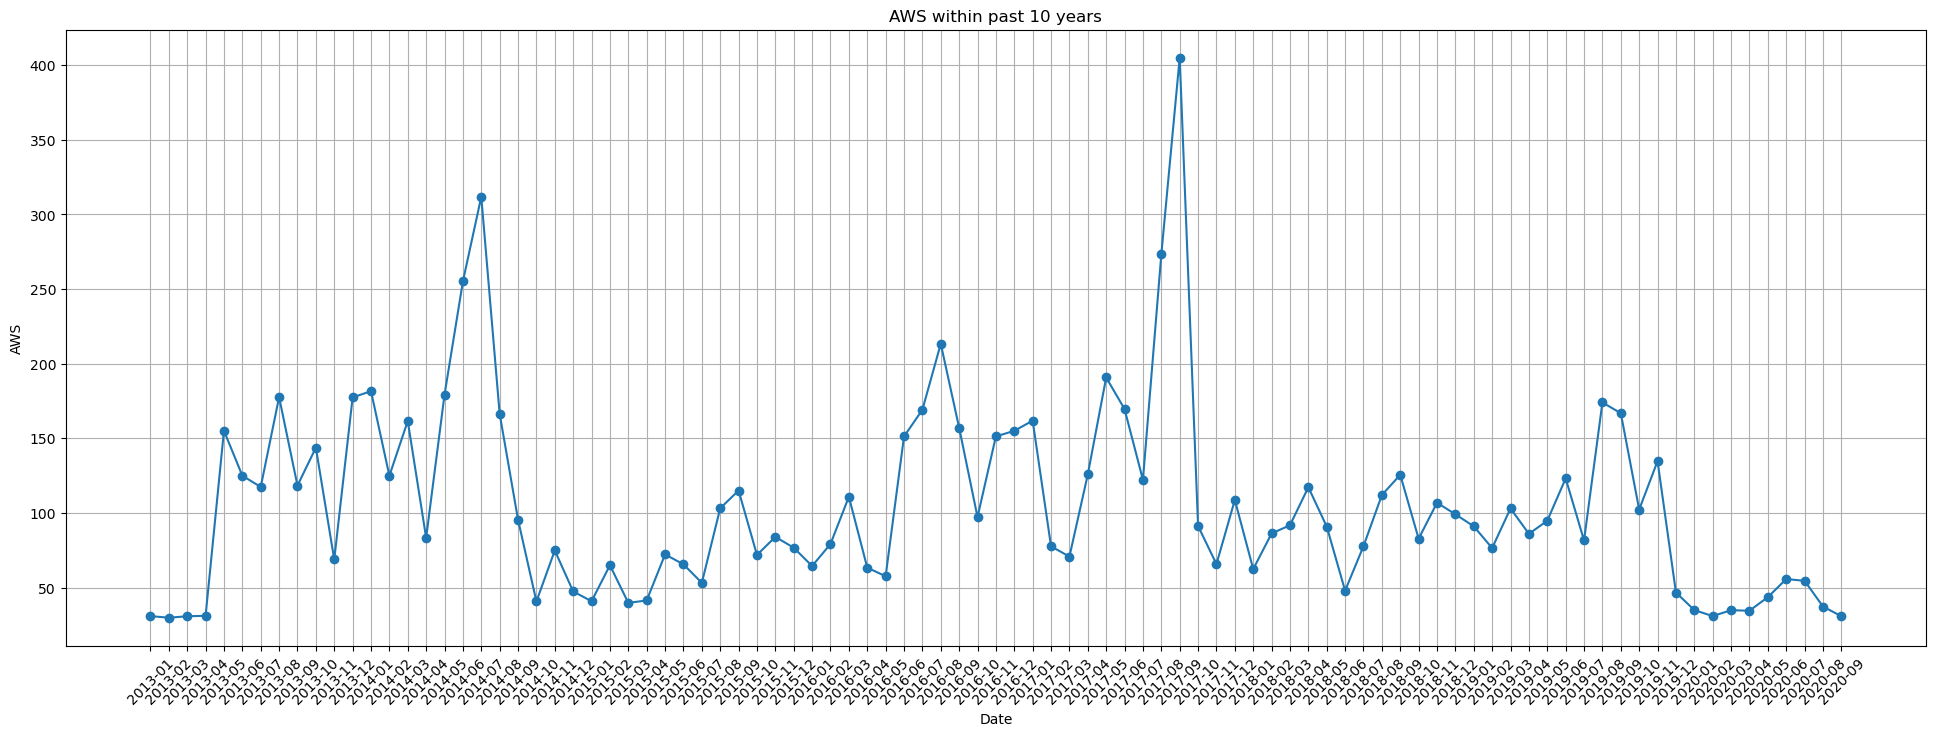

In [20]:
plt.figure(figsize=(24, 8))
plt.plot(result['Year-Month'], result['WND'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('AWS')
plt.title('AWS within past 10 years')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

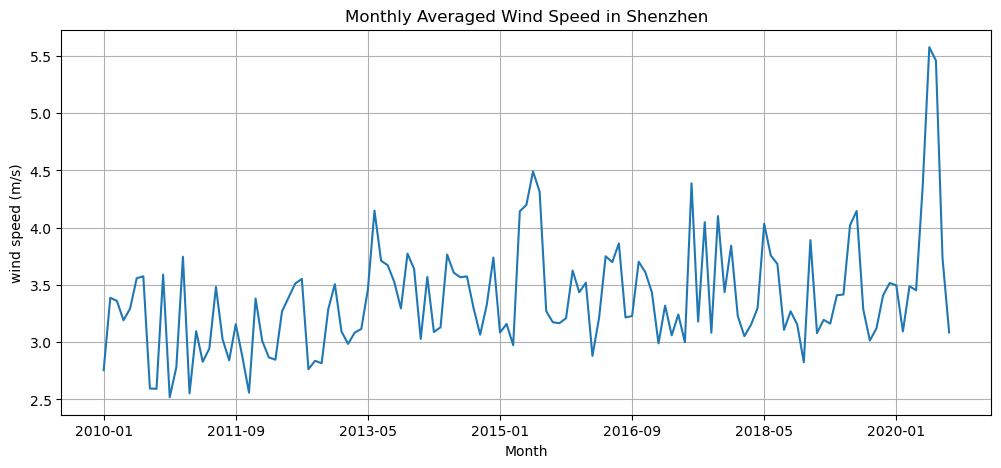

In [21]:
#参考代码
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
#读取文件，查看文件信息
ws=pd.read_csv(r'C:\Program1\jupyter_notebook\ese5023\2281305.csv',header=0,low_memory=False)
# print(ws.columns,ws.head(5))
#选取有效数据，进行数据处理，记得有scaling factor
ws=ws[['DATE','WND']]
ws[['direction_angle','direction_quality','type','speed','speed_quality']]=ws['WND'].str.split(',',expand=True)
ws['speed']=ws['speed'].astype(float)/10
ws[['yyyy','mm','ddHHMMSS']]=ws['DATE'].str.split('-',expand=True)
ws['yyyymm']=ws['yyyy'].astype(str)+'-'+ws['mm'].astype(str)
# print(ws.speed.max())
#根据user guide进行质量控制
#bad quality1: type==9
ws=ws[ws['type']!='9']
#bad quality2: windspeed>90 or windspeed<0
ws=ws[(ws['speed']>=0) & (ws['speed']<=90)]
#bad quality3: speed_quality=2,3,6,7
ws=ws[ws['speed_quality'].isin(['0','1','4','5','9'])]
#根据年月分组对风速取平均，并绘制时间序列
wsg=ws.groupby('yyyymm')['speed'].mean()
plt.figure(figsize=(12,5))
wsg.plot(xlabel='Month',ylabel='wind speed (m/s)',title='Monthly Averaged Wind Speed in Shenzhen',grid=True)
plt.show()

=========================================
# 3 Free Exploration
14/15  
3.1 读取csv/xls/xlsx文件，并清理缺失/低质量数据 5/5  
3.2 画出某个变量的时间序列——图表中变量需标注单位；横纵坐标标签太多时需手动设置  4/5  
3.3 对该变量进行至少5种简单的统计检验，并在报告中汇报你的发现 5/5


In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#第三题

In [22]:
data = pd.read_csv('new.csv')
data

,STATION,DATE,SOURCE,LATITUDE,LONGITUDE,ELEVATION,NAME,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,...,KA1,KA2,MA1,MD1,MW1,MW2,OC1,OD1,REM,EQD
0,57494099999,2023-01-01T00:00:00,4,30.783758,114.2081,34.44,"TIANHE, CH",FM-12,99999,V020,...,"120,M,+0088,1","120,N,-0020,1","99999,9,10285,1","2,1,010,1,+999,9","05,1",NaN,NaN,"3,99,0030,1,999",SYN12457494 04827 /3100 10052 20011 30285 4031...,NaN
1,57494099999,2023-01-01T00:00:00,4,30.783758,114.2081,34.44,"TIANHE, CH",FM-15,99999,V020,...,NaN,NaN,"10310,1,99999,9",NaN,"05,1",NaN,NaN,NaN,MET071METAR ZHHH 010000Z VRB01MPS 2400 HZ NSC ...,NaN
2,57494099999,2023-01-01T01:00:00,4,30.783758,114.2081,34.44,"TIANHE, CH",FM-15,99999,V020,...,NaN,NaN,"10310,1,99999,9",NaN,"05,1",NaN,NaN,NaN,MET071METAR ZHHH 010100Z VRB01MPS 2000 HZ NSC ...,NaN
3,57494099999,2023-01-01T02:00:00,4,30.783758,114.2081,34.44,"TIANHE, CH",FM-15,99999,V020,...,NaN,NaN,"10320,1,99999,9",NaN,"05,1",NaN,NaN,NaN,MET071METAR ZHHH 010200Z VRB01MPS 2500 HZ NSC ...,NaN
4,57494099999,2023-01-01T03:00:00,4,30.783758,114.2081,34.44,"TIANHE, CH",FM-12,99999,V020,...,"240,M,+0088,1","240,N,+0045,1","99999,9,10294,1","2,1,009,1,+999,9","05,1",NaN,NaN,"3,99,0030,1,999",SYN11857494 04830 /3302 10076 20001 30294 4032...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9593,57494099999,2023-11-04T18:00:00,4,30.783758,114.2081,34.44,"TIANHE, CH",FM-15,99999,V020,...,NaN,NaN,"10120,1,99999,9",NaN,"10,1",NaN,NaN,NaN,MET069METAR ZHHH 041800Z 12002MPS 080V140 5000...,NaN
9594,57494099999,2023-11-04T19:00:00,4,30.783758,114.2081,34.44,"TIANHE, CH",FM-15,99999,V020,...,NaN,NaN,"10110,1,99999,9",NaN,"10,1",NaN,NaN,NaN,MET061METAR ZHHH 041900Z 08003MPS 5000 BR OVC0...,NaN
9595,57494099999,2023-11-04T20:00:00,4,30.783758,114.2081,34.44,"TIANHE, CH",FM-15,99999,V020,...,NaN,NaN,"10100,1,99999,9",NaN,"10,1",NaN,NaN,NaN,MET061METAR ZHHH 042000Z 10002MPS 5000 BR OVC0...,NaN
9596,57494099999,2023-11-04T21:00:00,4,30.783758,114.2081,34.44,"TIANHE, CH",FM-12,99999,V020,...,"240,M,+0169,1","240,N,+0138,1","99999,9,10082,1","7,1,013,1,+999,9","21,1",NaN,NaN,"3,99,0030,1,999",SYN12457494 04321 /2801 10167 20161 30082 4011...,NaN


In [23]:
columns_to_check = ['WND', 'CIG', 'VIS', 'TMP', 'DEW', 'SLP']

In [24]:
cleaned_data = data.dropna(subset=columns_to_check, how='any')

In [25]:
print(f"原始数据行数: {len(data)}")
print(f"清理后的数据行数: {len(cleaned_data)}")
#第一问

原始数据行数: 9598
清理后的数据行数: 9598


In [26]:
data['DATE'] = pd.to_datetime(data['DATE'])

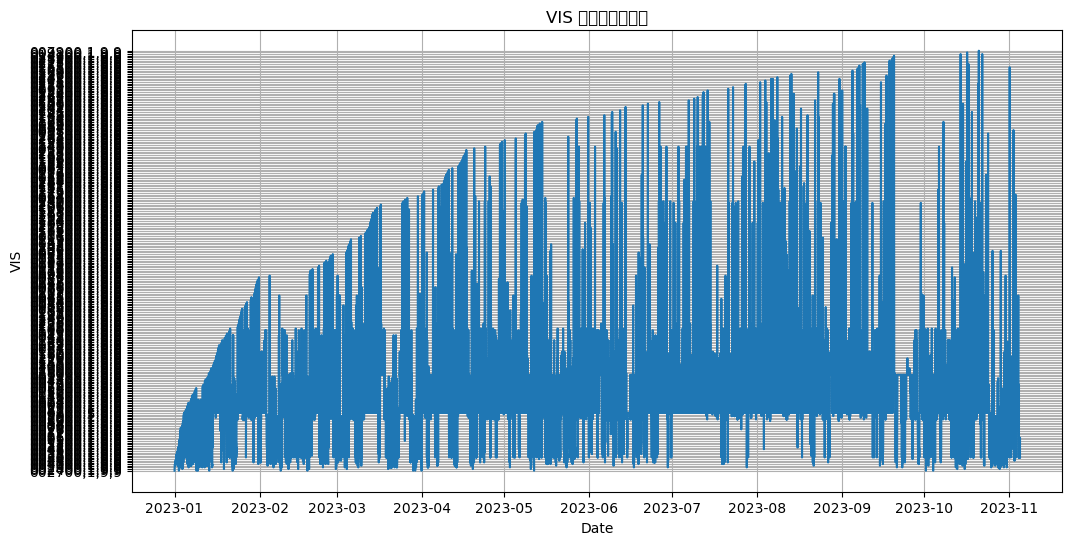

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(data['DATE'], data['VIS'])
plt.xlabel('Date')
plt.ylabel('VIS')
plt.title('VIS 变量的时间序列')
plt.grid(True)
plt.show()

In [68]:
#第三问
data['TMP'] = data['TMP'].str.replace('[^\d.]', '', regex=True).astype(float)
data['DEW'] = data['DEW'].str.replace('[^\d.]', '', regex=True).astype(float)

correlation = data['TMP'].corr(data['DEW'])

mean_tmp = data['TMP'].mean()
mean_dew = data['DEW'].mean()

std_tmp = data['TMP'].std()
std_dew = data['DEW'].std()

print(f"'TMP' 和 'DEW' 的相关性: {correlation}")
print(f"'TMP' 的均值: {mean_tmp}")
print(f"'DEW' 的均值: {mean_dew}")
print(f"'TMP' 的标准差: {std_tmp}")
print(f"'DEW' 的标准差: {std_dew}")
#若要计算五对数据，直接修改变量即可，其余数据将展示在PDF中

'TMP' 和 'DEW' 的相关性: 0.34624616741152503
'TMP' 的均值: 2043.3723692435924
'DEW' 的均值: 1512.897374453011
'TMP' 的标准差: 1348.2911987888717
'DEW' 的标准差: 1292.5655653557192
